In [15]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [16]:
import numpy as np
import pandas as pd

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

**Importing the dataset**

In [18]:
df = pd.read_csv("Social_Network_Ads.csv")

In [19]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [20]:
df = df.drop("User ID",axis = 1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [21]:
df['Gender'].isna().unique() # There are no null values in "Gender" column.
df['Age'].isna().unique()   # There are no null values in "Age" column.
df["EstimatedSalary"].isna().unique()  # There are no null values in "EstimatedSalary" column.
df["Purchased"].isna().unique() # There are no null values in "Purchased" column.

array([False])

In [22]:
"""
let's see what categorical values that we have in "Gender" and "Purchased" colummns.
"""
df['Gender'].value_counts()  #WE have two categorical values that we can encode them with "0" and "1".
df["Purchased"].value_counts()  #"Purchased" column also have only two categorical values.

0    257
1    143
Name: Purchased, dtype: int64

In [30]:
"""
ENCODING CATEGORICAL VALUES INTO NUMERICAL VALUES.
"""
df['Gender'] = df['Gender'].replace(["Male","Female"],[1,0])
df["Gender"].value_counts()

0    204
1    196
Name: Gender, dtype: int64

In [24]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


**Splitting the dataset into the Training set and Test set**

In [31]:
X = df[['Gender','Age','EstimatedSalary']].values
y = df['Purchased'].values


In [26]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Feature Scaling**

In [28]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [34]:
for i in [1,2,3,4,5,6,7,8,9,10,20,30]:
  knn = KNeighborsClassifier(i)
  knn.fit(x_train,y_train)
  print("K value: ",i,"Train accuracy: ",knn.score(x_train,y_train),"val accuracy: ",np.mean(cross_val_score(knn,x_train,y_train,cv = 10)))

K value:  1 Train accuracy:  0.996875 val accuracy:  0.878125
K value:  2 Train accuracy:  0.9375 val accuracy:  0.859375
K value:  3 Train accuracy:  0.928125 val accuracy:  0.890625
K value:  4 Train accuracy:  0.915625 val accuracy:  0.8875
K value:  5 Train accuracy:  0.9125 val accuracy:  0.909375
K value:  6 Train accuracy:  0.915625 val accuracy:  0.9
K value:  7 Train accuracy:  0.915625 val accuracy:  0.903125
K value:  8 Train accuracy:  0.915625 val accuracy:  0.9
K value:  9 Train accuracy:  0.9125 val accuracy:  0.90625
K value:  10 Train accuracy:  0.9125 val accuracy:  0.90625
K value:  20 Train accuracy:  0.909375 val accuracy:  0.871875
K value:  30 Train accuracy:  0.871875 val accuracy:  0.846875


In [35]:
"""
Here we have to look for the best fit model 
that model should not over fit
Here we found that the k=5 have the best accuracy in predicting this kind of data.
"""

knn = KNeighborsClassifier(5)
knn.fit(x_train,y_train)


KNeighborsClassifier()

**Predicting the Test set results**

In [36]:
y_pred = knn.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve

In [38]:
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.34


**Making the Confusion Matrix**

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.34      1.00      0.50        27

    accuracy                           0.34        80
   macro avg       0.17      0.50      0.25        80
weighted avg       0.11      0.34      0.17        80



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
print(confusion_matrix(y_test,y_pred))

[[ 0 53]
 [ 0 27]]


In [43]:
import seaborn as sn

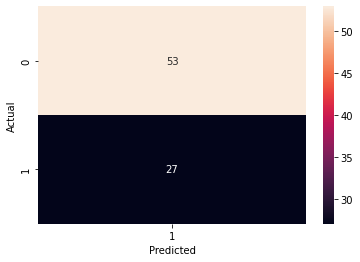

In [44]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


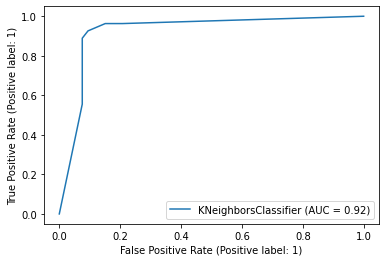

In [45]:
plot_roc_curve(knn, x_test, y_test)